<a href="https://colab.research.google.com/github/2403A52L07/Generative-AI/blob/main/Assignment_7_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/300
39/39 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - accuracy: 0.5119 - loss: 0.6961 - val_accuracy: 0.5325 - val_loss: 0.6976
Epoch 2/300
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5358 - loss: 0.6970 - val_accuracy: 0.5649 - val_loss: 0.6945
Epoch 3/300
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5620 - loss: 0.6914 - val_accuracy: 0.5844 - val_loss: 0.6919
Epoch 4/300
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.5943 - loss: 0.6969 - val_accuracy: 0.6104 - val_loss: 0.6896
Epoch 5/300
39/39 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - accuracy: 0.6383 - loss: 0.6901 - val_accuracy: 0.6234 - val_loss: 0.6874
Epoch 6/300
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.6326 - loss: 0.6877 - val_accuracy: 0.6494 - val_loss: 0.6855
Epoch 7/300
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.6518 - loss: 0.6846 - val_accuracy: 0.6299 - val_loss: 0.6836
Epoch 8/300
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.7005 - loss: 0.6800 - val_accuracy: 0.6

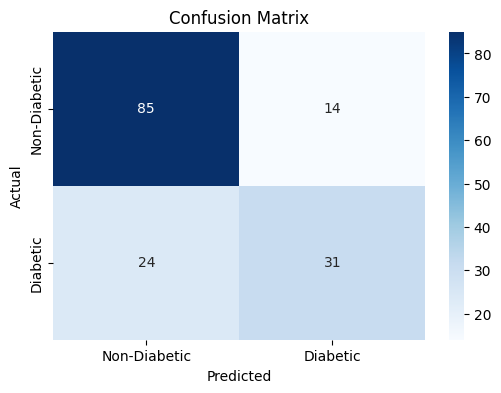

ValueError: Unable to synchronously create dataset (name already exists)

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adagrad
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import joblib
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
data = pd.read_csv("/content/diabetes.csv") # Change to your dataset

# Split into features (X) and target (y)
X = data.iloc[:, :-1].values # All columns except the last
y = data.iloc[:, -1].values # Last column (target)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Save the scaler for future use
joblib.dump(scaler, "scaler.pkl")

# Define the ANN model
model = Sequential([
    Dense(12, activation="swish", input_shape=(X_train.shape[1],)),
    Dense(25, activation="swish"),
    Dense(15, activation="swish"),
    Dense(1, activation="sigmoid") # Output layer for binary classification
])

# Compile the model
model.compile(optimizer=Adagrad(), loss="binary_crossentropy", metrics=["accuracy"])

# Train the model
history = model.fit(X_train, y_train, epochs=300, batch_size=16, validation_data=(X_test, y_test))

# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test, y_test)

# Predict classes
y_pred = (model.predict(X_test) > 0.5).astype("int32")

# Confusion matrix and classification report
cm = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred, target_names=["Non-Diabetic", "Diabetic"])

# Print results
print(f"Test Accuracy: {test_accuracy:.4f}")
print(report)

# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Non-Diabetic", "Diabetic"],
            yticklabels=["Non-Diabetic", "Diabetic"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Save the trained model
model.save("diabetes_ann_model.h5")
print("Model saved successfully!")

# Load the trained model and scaler
def load_trained_model():
    return load_model("diabetes_ann_model.h5"), joblib.load("scaler.pkl")

# Predict function
def predict_diabetes(input_data):
    model, scaler = load_trained_model()
    input_array = np.array(input_data).reshape(1, -1)
    input_scaled = scaler.transform(input_array)
    prediction = model.predict(input_scaled)
    return "Diabetic" if prediction > 0.5 else "Non-Diabetic"

# Example input
sample_input = [6, 148, 72, 35, 0, 33.6, 0.627, 50] # Replace with real data
result = predict_diabetes(sample_input)
print(f"Prediction: {result}")